In [61]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import coordinates as coord
import astropy.units as u
import ligo.skymap.plot
import gbmgeometry as gbmg
%matplotlib inline
import h5py
import os
import numpy as np
import pandas as pd
envpath = os.environ.get('SIMULATOR')
simname = "OneTwoH"
gpname = "gp0"
simpath=envpath+"/"+simname+"_Files/"
file=h5py.File(simpath+simname+".hdf5","r")
fisher=file["/grid/"+gpname+"/fisher"]
gptruepos=file["/grid/"+gpname].attrs["True Position"]
gptruepossc = SkyCoord(gptruepos[0]*u.degree,gptruepos[1]*u.degree)

In [49]:
flist=[]
fname=[]
for f in fisher:
    flist.append(fisher[f].attrs['Position'])
    fname.append(f)
flist=np.transpose(flist)

In [40]:
fig =plt.figure(figsize=(10,10),dpi=400)

<Figure size 4000x4000 with 0 Axes>

In [17]:
pos = gbmg.PositionInterpolator(trigdat="/home/niklasvm/Envs/Plot/rawdata/glg_trigdat_all_bn131229277_v02.fit")
time=0
sc=pos.sc_pos(time)
sq=pos.quaternion(time)


In [83]:
H=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistH.npy")
xe=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistxe.npy")
ye=np.load("/home/niklasvm/Envs/Simulator/GBMGridSimulator/2dhistye.npy")

In [118]:
fermi=gbmg.GBM(sq,sc_pos=sc)

In [135]:
n5=fermi.n5.get_fov(10)
n4=fermi.n4.get_fov(10)
n3=fermi.n3.get_fov(10)
b0=fermi.b0.get_fov(10)

In [10]:
center=fermi.n2.center

In [126]:
lon=277
lat=26

In [129]:
print(np.cos(lon)*np.cos(lat))
print(np.sin(lon)*np.cos(lat))
np.sin(lat)

0.5549193724456322
0.33251932227570336


0.7625584504796027

In [125]:
SkyCoord(ra=277*u.degree,dec=26*u.degree,frame='icrs').transform_to("AltAz")

ValueError: Transform `frame` must be a frame name, class, or instance

In [130]:
list(file["grid/gp0/(0,0)"].attrs)

['FITSPath', 'SelectedDetectors', 'SignificanceDict']

In [132]:
file["grid/gp0/(0,0)"].attrs["SelectedDetectors"]

array([b'n2', b'n4', b'n5', b'b0'], dtype='|S2')

In [133]:
file["grid/gp0/(0,0)"].attrs["SignificanceDict"]

b'{"na": 1.9211834631645615, "nb": 1.4142077283191943, "n8": 1.8893587030162653, "n9": 1.2845565289781158, "b0": 48.91171753256757, "b1": 0.11826259968353665, "n0": 12.581019664108078, "n1": 25.94265882770179, "n2": 26.61053223891591, "n3": 26.216431907063875, "n4": 27.49312972368273, "n5": 47.19516117778281, "n6": 1.552393599457918, "n7": 1.0318184927898053}'

/home/niklasvm/Envs/Plot/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/niklasvm/Envs/Plot/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/niklasvm/Envs/Plot/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/niklasvm/Envs/Plot/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]


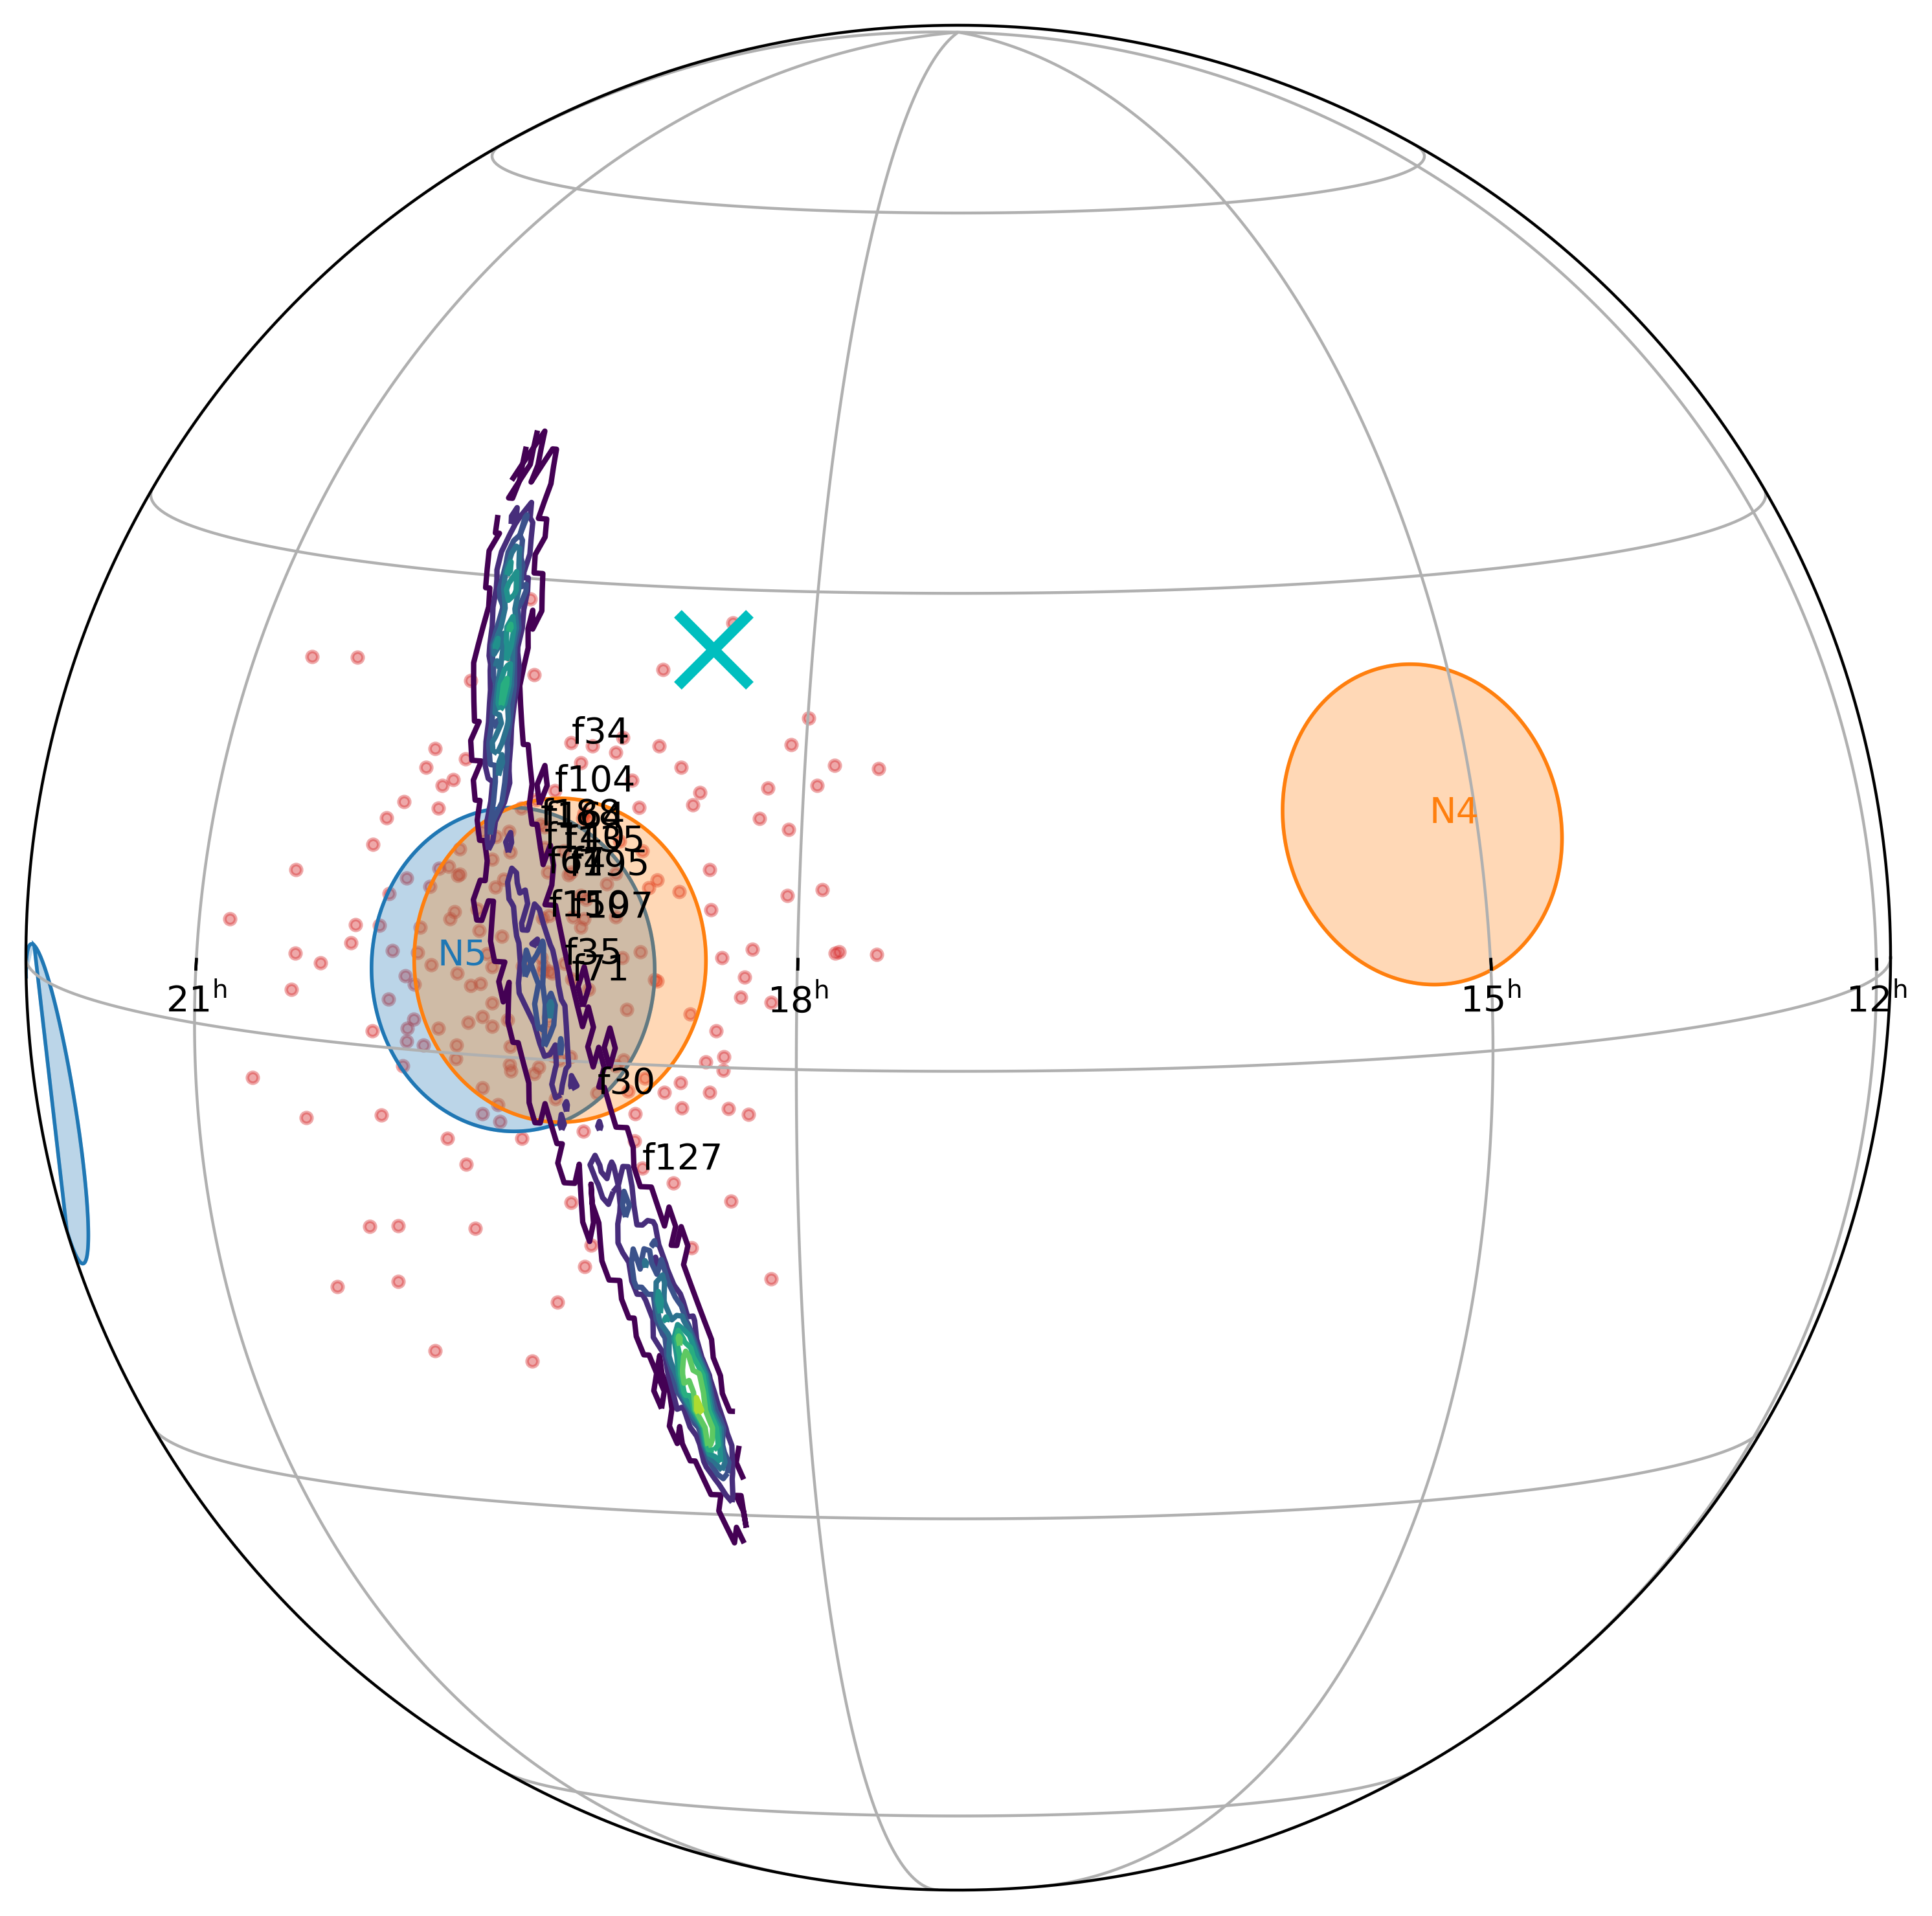

In [140]:
fig =plt.figure(figsize=(8,8),dpi=400)
#ax=plt.axes([0.05,0.05,0.9,0.9],projection="astro zoom",center=center,radius=120*u.degree)
ax=plt.axes([0.05,0.05,0.9,0.9],projection="astro globe",center=center)
ax.grid()
ax.plot(277,26,marker=ligo.skymap.plot.reticle(inner=0,angle=45),markersize=20,markeredgewidth=3,color='c',transform=ax.get_transform('world'))
ax.fill(n5[0],n5[1],transform=ax.get_transform('world'),alpha=0.3,color='#1f77b4')
ax.fill(n5[0],n5[1],transform=ax.get_transform('world'),fill=False,color='#1f77b4')
ax.fill(n2[0],n2[1],transform=ax.get_transform('world'),alpha=0.3,color='#1f77b4')
ax.fill(n2[0],n2[1],transform=ax.get_transform('world'),fill=False,color='#1f77b4')
ax.fill(n4[0],n4[1],transform=ax.get_transform('world'),alpha=0.3,color='#ff7f0e')
ax.fill(n4[0],n4[1],transform=ax.get_transform('world'),fill=False,color='#ff7f0e')
ax.fill(b0[0],b0[1],transform=ax.get_transform('world'),alpha=0.3,color='#ff7f0e')
ax.fill(b0[0],b0[1],transform=ax.get_transform('world'),fill=False,color='#ff7f0e')
ax.contour(H,extent=[xe[0],xe[-1],ye[0],ye[-1]],transform=ax.get_transform('world'))
ax.scatter(flist[0],flist[1],transform=ax.get_transform('world'),alpha=0.4,color='#d62728',marker='.')
ax.annotate("N4",(fermi.n4.center.icrs.ra.degree,fermi.n4.center.icrs.dec.degree),xycoords=ax.get_transform('world'),color='#ff7f0e')
ax.annotate("N5",(fermi.n5.center.icrs.ra.degree+5,fermi.n5.center.icrs.dec.degree),xycoords=ax.get_transform('world'),color='#1f77b4')
for i,f in enumerate(fisher):
    if f in dist10['name'].to_numpy():
        ax.annotate(str(f),(flist[0][i],flist[1][i]),xycoords=ax.get_transform('world'))
plt.show()

In [16]:
center=SkyCoord(ra=260*u.degree,dec=7*u.degree,frame='icrs')

In [58]:
center.icrs.ra.deg

342.645420194876

In [76]:
sccord=SkyCoord(ra=testn2[0]*u.degree,dec=testn2[1]*u.degree,frame='icrs')

In [63]:
ls={}
ls["name"]=[]
ls["distance"]=[]
for i,f in enumerate(fisher):
    pos=fisher[f].attrs["Position"]
    possc=SkyCoord(pos[0]*u.degree,pos[1]*u.degree)
    dl=fermi.detectors['n4'].get_center().separation(possc)
    ls["name"].append(f)
    ls["distance"].append(dl.degree)
df=pd.DataFrame.from_dict(ls)   
dist10=df.query("55<=distance<=57")

In [66]:
dist10['name'].to_numpy()

array(['f104', 'f127', 'f135', 'f140', 'f150', 'f164', 'f188', 'f195',
       'f197', 'f30', 'f34', 'f35', 'f4', 'f67', 'f71'], dtype=object)

In [87]:
H

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 2., ..., 0., 0., 0.],
       [1., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 2.]])

In [92]:
np.max(H)

40.0